In [42]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Genres in Top 100 Profited Movies

One of a variable that pops into our brain when we hear the question "What is the best type of movie to make for maximum profit?" is genre.

### Import Data

In [43]:
title_basics = pd.read_csv('data/imdb.title.basics.csv.gz')
movie_budgets = pd.read_csv('data/tn.movie_budgets.csv.gz')

### Combine Data Tables

With the two data tables, we will merge them using movie title and year the movie was released so that we can have one dataframe with production budget, worldwide gross, and genres variables. There were movies with same title but are not teh same movie. So, we also use the year to merge the table as well.

In [44]:
#Create a column for year in movie_budget table
movie_budgets['release_year'] = movie_budgets['release_date'].str[-4:].astype(float)

#Combine movie_budget table with title_basics using movie title and released year
profit = movie_budgets.merge(title_basics, how='left', left_on=['movie', 'release_year'], right_on=['original_title', 'start_year'])
profit.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011.0,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019.0,tt6565702,Dark Phoenix,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015.0,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017.0,NaN,NaN,NaN,NaN,NaN,NaN
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220",2015.0,NaN,NaN,NaN,NaN,NaN,NaN
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",2018.0,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018.0,149.0,"Action,Adventure,Sci-Fi"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425",2007.0,NaN,NaN,NaN,NaN,NaN,NaN
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209",2017.0,tt0974015,Justice League,Justice League,2017.0,120.0,"Action,Adventure,Fantasy"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923",2015.0,tt2379713,Spectre,Spectre,2015.0,148.0,"Action,Adventure,Thriller"


### Clean the dataframe

The dataframe now needs to be cleaned. We will drop any null values and duplicates from the data table. 

In [32]:
# Drop null values
profit.dropna(inplace=True)

In [33]:
# Make a new dataframe with just the columns we need
condensed_profit = profit[['movie', 'genres', 'production_budget', 'domestic_gross', 'worldwide_gross']]

In [34]:
# Drop any duplicates
condensed_profit = condensed_profit.drop_duplicates(subset=['movie'])

In [35]:
# Change the columns that are string numbers to float
condensed_profit['production_budget'] = condensed_profit['production_budget'].str.replace(',', '').str[1:].astype(float)
condensed_profit['domestic_gross'] = condensed_profit['domestic_gross'].str.replace(',', '').str[1:].astype(float)
condensed_profit['worldwide_gross'] = condensed_profit['worldwide_gross'].str.replace(',', '').str[1:].astype(float)

### Create new columns for Profit and Net Profit Margin

Now, we will use wordwide_gross and production_budget to find the profit of the movie. We also found the net profit margin because we wanted to make sure that the movie generated enough profit from its sales and whether production budget was being contained.

In [45]:
condensed_profit['profit'] = condensed_profit['worldwide_gross'] - condensed_profit['production_budget']
condensed_profit['net_profit_margin'] = (condensed_profit['profit'] / condensed_profit['worldwide_gross']) * 100

The, we want to make sure our data set has movies that have good net profit margin. So we filter the data so that we only have movies that had net profit margin over 70% and sort it by profit.

In [48]:
# Sort by Net Profit Margin (>70%) and Profit
condensed_profit = condensed_profit[condensed_profit['net_profit_margin'] > 70]
condensed_profit = condensed_profit.sort_values(by=['profit'], ascending=False)
condensed_profit.head(10)

,movie,original_title,genres,production_budget,domestic_gross,worldwide_gross,profit,net_profit_margin
6,Avengers: Infinity War,Avengers: Infinity War,"Action,Adventure,Sci-Fi",300000000.0,678815482.0,2.048134e+09,1.748134e+09,85.352522
33,Jurassic World,Jurassic World,"Action,Adventure,Sci-Fi",215000000.0,652270625.0,1.648855e+09,1.433855e+09,86.960647
26,The Avengers,The Avengers,"Action,Adventure,Sci-Fi",225000000.0,623279547.0,1.517936e+09,1.292936e+09,85.177240
41,Black Panther,Black Panther,"Action,Adventure,Sci-Fi",200000000.0,700059566.0,1.348258e+09,1.148258e+09,85.166046
114,Jurassic World: Fallen Kingdom,Jurassic World: Fallen Kingdom,"Action,Adventure,Sci-Fi",170000000.0,417719760.0,1.305773e+09,1.135773e+09,86.980890
157,Frozen,Frozen,"Adventure,Animation,Comedy",150000000.0,400738009.0,1.272470e+09,1.122470e+09,88.211902
136,Beauty and the Beast,Beauty and the Beast,"Family,Fantasy,Musical",160000000.0,504014165.0,1.259200e+09,1.099200e+09,87.293517
681,Minions,Minions,"Adventure,Animation,Comedy",74000000.0,336045770.0,1.160336e+09,1.086336e+09,93.622538
3,Avengers: Age of Ultron,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",330600000.0,459005868.0,1.403014e+09,1.072414e+09,76.436443
43,Incredibles 2,Incredibles 2,"Action,Adventure,Animation",200000000.0,608581744.0,1.242521e+09,1.042521e+09,83.903689


### Visualization

Now, we have an organized data we can use to see what genres are popular in the top 100 most profited movies. 

FileNotFoundError: [Errno 2] No such file or directory: 'images/genres_in_top_100_profited_movies.png'

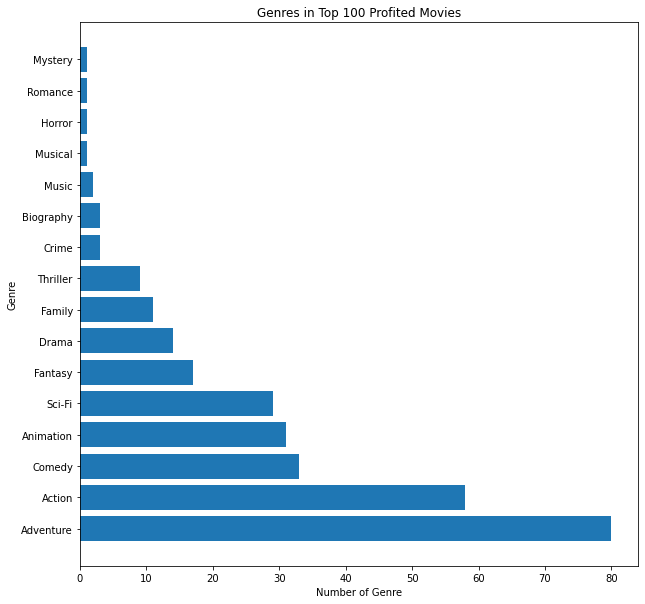

In [49]:
# Make a list of genres from the top 100 rows
genres = list(condensed_profit['genres'].iloc[:100])

top_100_profit_genre_list = []

# Split the genres for each movie
for genre in genres:
    each_genre = genre.split(',')
    for index in range(len(each_genre)):
        top_100_profit_genre_list.append(each_genre[index])

top_100_profit_genre_dict = {}

# Make a dictionary to count number of each genres
for genre in top_100_profit_genre_list:
    if genre in top_100_profit_genre_dict.keys():
        top_100_profit_genre_dict[genre] += 1
    else:
        top_100_profit_genre_dict[genre] = 1
        
# Sort the dictionary by count
top_100_profit_genre_dict = dict(sorted(top_100_profit_genre_dict.items(), key=lambda x : x[1], reverse=True))

#Make a bar chart to represent genres in top 100 profited movies
fig, ax = plt.subplots(figsize=(10, 10))

x = list(top_100_profit_genre_dict.keys())
height = list(top_100_profit_genre_dict.values())

ax.barh(x, height)
ax.set_title('Genres in Top 100 Profited Movies')
ax.set_xlabel('Number of Genre')
ax.set_ylabel('Genre')

plt.savefig('images/genres_in_top_100_profited_movies.png')

Since we saw which genres are popular, we will see which set of genres are popular in most profited movies.

Text(0, 0.5, 'Set of Genre')

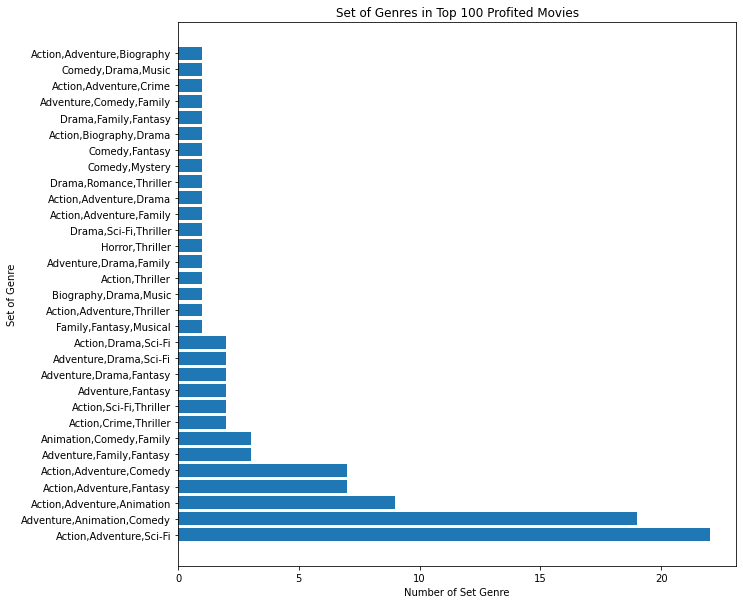

In [41]:
# Make a list of top 100 genres
top_100_profit_genre_set_list = list(condensed_profit['genres'].iloc[:100])

top_100_profit_genre_set_dict = {}

# Make a dictionary to count number of sets of genres
for genre in top_100_profit_genre_set_list:
    if genre in top_100_profit_genre_set_dict.keys():
        top_100_profit_genre_set_dict[genre] += 1
    else:
        top_100_profit_genre_set_dict[genre] = 1

# Sort the dictionary by count
top_100_profit_genre_set_dict = dict(sorted(top_100_profit_genre_set_dict.items(), key=lambda x : x[1], reverse=True))

#Make a bar chart to represent genres in top 100 profited movies
fig, ax = plt.subplots(figsize=(10, 10))

x = list(top_100_profit_genre_set_dict.keys())
height = list(top_100_profit_genre_set_dict.values())

ax.barh(x, height)
ax.set_title('Set of Genres in Top 100 Profited Movies')
ax.set_xlabel('Number of Set of Genre')
ax.set_ylabel('Set of Genre')

plt.savefig('images/set_of_genres_top_100_profited_movies.png')

### Conclusion

From looking at the bar graph, we can see that Adventure, Action, Comedy, Animation, and Sci-Fi were the top 5 popular genres and "Action, Adventure, Sci-Fi" and "Adventure, Animation, Comedy" were the top 2 popular sets of genre.